In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# I decided to perform my analysis on bottoms (jeans/pants), because in my experience it's one of the most
# problematic categories in online shopping 
 

# openning pkl-ed file with jeans information
df = pd.read_pickle("../df_bottoms_combined.pkl")

In [5]:
df.head()

,name,review_title,review_body,rating,date_posted,usual_size,size_purchased,height,fit,weight,product_type,BMI
0,Kimbo6,The most comfortable jeans ever,I now live in these jeans. They are so comfort...,5.00,"April 12, 2020",Usual Size: 26,Size Purchased: 25,Height: 5′ 7″,Fit Purchased: Ankle,NaN,The Cheeky Straight Jean,NaN
1,Kshop321,Nice Jean,I went with the 27 noting the other reviews th...,5.00,"April 5, 2020",Usual Size: 28,Size Purchased: 27,Height: 5′ 6″,Fit Purchased: Ankle,Weight: 140,The Cheeky Straight Jean,22.59
2,ac11189,Nice quality but too tight around thighs,"I'm 5'1 and petite, with a tiny waist but also...",4.00,"April 5, 2020",Usual Size: 23,Size Purchased: 23,Height: 5′ 1″,Fit Purchased: Ankle,Weight: 110,The Cheeky Straight Jean,20.78
3,Louise03,Exactly as Expected,"High quality, comfortable, and TTS. These jean...",5.00,"April 2, 2020",Usual Size: 25,Size Purchased: 25,Height: 5′ 7″,Fit Purchased: Ankle,Weight: 125,The Cheeky Straight Jean,19.58
4,ATColorado,Worst Customer Service!,My delivery never arrived even though the trac...,1.00,"April 2, 2020",NaN,NaN,NaN,NaN,NaN,The Cheeky Straight Jean,NaN


**_Some cleaning on reviews_**

In [6]:
df['review_clean'] = df['review_body']

In [7]:
import re
import string

In [ ]:
# Making functions for cleaning punctuation, making all text lowercase, removing any numerical values, line separators
# Ideally it's better to do this step for pre-cleaning the text, 
# however, sklearn holds most of the exceptions --> not neccesary
# will skip this step

def text_cleaning(text):
    text = text.lower() # Make text lowercase
    text = re.sub('\[.*?\]', '', text) # remove text in square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
    text = re.sub('\d*', '', text) # remove numbers containing numbers
    text = re.sub('[‘’“”…]', '', text) # some additional punctuation and non-sensical text
    text = re.sub('\n', '', text) # line separaters
    text = re.sub('[⅞,à]', '', text) #through couple of itirations found these numbers, letters
    return text

In [ ]:
# applying function to the review column
df['review_clean'] = df['review_clean'].apply(text_cleaning)

In [ ]:
df.head(3)

In [ ]:
df['review_clean']

**_Topic modeling with NMF matrix and TfidfVectorizer_**

In [8]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from nltk.corpus import stopwords

In [9]:
# function for displaying topics - will be used further in the topic modeling analysis
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [10]:
# For topic modeling I created another column for extracting only nouns, adjectives and verbs (dividing by parts of the speach)
## For that purpose I'm using NLTK Python's library 
## In many iterations on my side while I was making the project - this way was the most efficient one
### because these parts of speach are the most informative   

df['review_nltk'] = df['review_clean']

In [11]:
from nltk import word_tokenize, pos_tag

In [12]:
def nouns_adj_verbs(text):
    is_noun_adj_verb = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ' or pos[:2] == 'VB'
    tokenized = word_tokenize(text)
    nouns_adj_verb = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj_verb(pos)] 
    return ' '.join(nouns_adj_verb)

In [13]:
# Applying function for extracting parts of speach
df['review_nltk'] = df['review_nltk'].apply(nouns_adj_verbs)

In [14]:
df['review_nltk']

0       live jeans are comfortable flattering dont wan...
1       went noting other reviews run little large say...
2       'm petite tiny waist butt have lot trouble fin...
3       High quality comfortable TTS jeans do make rea...
4       delivery arrived tracking says complete have e...
                              ...                        
9211    right amount stretch perfect inseam length are...
9212    flare is great length is perfect rise is Too h...
9213    were comfy cute endless compliments night Very...
9214    fit is flattering feel put chic love modern ’ ...
9215    Comfortable Soft stretchy keeping everything r...
Name: review_nltk, Length: 9216, dtype: object

In [15]:
# Expending stop words list
## downloading stopwords for that
stop_words_ = stopwords.words('english') # 'english' - most common english words

In [16]:
new_stop_list = (['jeans', 'everlane', 'pair', 't', 'denim', 'pants', 'jean', 'bit',
                'authentic', 'places', 'love', 'right', 'find', 'super', 'great',
                 'look', 'good', 'wish', 'new'])

In [17]:
#adding new words to stop words list
stop_words_.extend(new_stop_list)

In [18]:
reviews = list(df.review_nltk)

In [19]:
tfidf = TfidfVectorizer(stop_words=stop_words_, ngram_range=(1, 2), analyzer='word', token_pattern=r'\b[^\d\W]+\b')
doc_word = tfidf.fit_transform(reviews)
doc_word.shape

(9216, 85951)

In [20]:
pd.DataFrame(doc_word.toarray(), index=reviews, columns=tfidf.get_feature_names()).head(1)

,aam,aam wondering,abdomen,abdomen case,abdomen go,abdomen ordering,abdomen please,abercrombie,abercrombie fitch,ability,...,zone hugs,zone length,zone loose,zone medium,à,à belt,à la,à taille,⅞,⅞ length
live jeans are comfortable flattering dont want take,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
nmf_model = NMF(5)
doc_topic = nmf_model.fit_transform(doc_word)

In [22]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = (["component_1","component_2", "component_3",
                      "component_4","component_5"]),
             columns = tfidf.get_feature_names())
topic_word

,aam,aam wondering,abdomen,abdomen case,abdomen go,abdomen ordering,abdomen please,abercrombie,abercrombie fitch,ability,...,zone hugs,zone length,zone loose,zone medium,à,à belt,à la,à taille,⅞,⅞ length
component_1,0.001,0.001,0.001,0.0,0.000,0.000,0.001,0.0,0.0,0.004,...,0.001,0.0,0.001,0.000,0.001,0.000,0.0,0.0,0.000,0.000
component_2,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.002,...,0.000,0.0,0.000,0.000,0.001,0.001,0.0,0.0,0.000,0.000
component_3,0.001,0.001,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.000,...,0.000,0.0,0.000,0.001,0.000,0.000,0.0,0.0,0.000,0.000
component_4,0.000,0.000,0.002,0.0,0.001,0.001,0.000,0.0,0.0,0.000,...,0.000,0.0,0.000,0.001,0.000,0.000,0.0,0.0,0.001,0.001
component_5,0.000,0.000,0.001,0.0,0.001,0.000,0.000,0.0,0.0,0.004,...,0.000,0.0,0.001,0.000,0.000,0.000,0.0,0.0,0.000,0.000


In [23]:
doc_topic_nmf = pd.DataFrame(doc_topic.round(5),
                             index = reviews,
                             columns = (["component_1","component_2", "component_3",
                                          "component_4","component_5"]))
doc_topic_nmf

,component_1,component_2,component_3,component_4,component_5
live jeans are comfortable flattering dont want take,0.00000,0.06209,0.00000,0.00000,0.00000
went noting other reviews run little large say are more true size exchange do have give feel waistline is little small don ’ t seem have fabric loosen day Overall jean wonderful quality Color received shown line,0.04492,0.00000,0.00000,0.01056,0.00273
'm petite tiny waist butt have lot trouble finding jeans/pants fit sister has similar body shape has cheeky same size fit bought same size thinking be similar cut were flattering have liked waist was great nice snug were tight hips thighs felt wearing skinny jeans were knee go size think be big waist shade jeans are great think cut does suit body shape,0.03263,0.00000,0.00000,0.08282,0.00000
High quality comfortable TTS jeans do make rear look great,0.00000,0.02996,0.00000,0.00000,0.04868
delivery arrived tracking says complete have emailed company times phone number is listed received auto reply are busy believe is unacceptable service order Everlane other products have are ok buy deep sale price nothing brand is premium quality opinion,0.00424,0.00155,0.00020,0.00461,0.00374
...,...,...,...,...,...
right amount stretch perfect inseam length are tall feel retro cool are wearable,0.00000,0.05663,0.04055,0.00000,0.00032
flare is great length is perfect rise is Too high petite figure- flattering said ’ m keeping ’ ll try Shirts ’ ll leave tucked medium rise hit,0.00000,0.00641,0.04070,0.00000,0.06107
were comfy cute endless compliments night Very happy made purchase need pair jeans Cute sneakers heels,0.00672,0.00468,0.00304,0.00963,0.00008
fit is flattering feel put chic love modern ’ s bring simple shirt flats,0.00000,0.02686,0.00000,0.01400,0.00000


In [24]:
display_topics(nmf_model, tfidf.get_feature_names(), 20)


Topic  0
size, true, true size, black, ordered, color, wear, wash, fit, blue, fit true, bought, little, washed, got, size fit, fits, washed black, usual, ordered size

Topic  1
comfortable, stretch, flattering, amount, amount stretch, perfect, fit, comfortable fit, comfortable flattering, perfect amount, fit comfortable, flattering comfortable, fit perfect, day, wear, perfect fit, feel, fit flattering, stretch comfortable, comfortable amount

Topic  2
length, ankle, ankle length, perfect, length perfect, short, regular, perfect length, regular length, tall, shorter, got, hit, petite, height, hits, got ankle, fits, length fit, hit ankle

Topic  3
waist, fit, hips, thighs, curvy, tight, butt, legs, fit waist, feel, gap, straight, leg, small, little, high waist, big, finding, hard, body

Topic  4
high, rise, high rise, skinny, stretch, waisted, high waisted, high waist, rise skinny, quality, stretch high, high quality, fit high, black, mid, wash, rise high, mid rise, comfortable high, st

In [25]:
# making copy of Data Frame with topic distribution
df_topics = doc_topic_nmf.copy()

In [26]:
# assighning each review to specific topic by majority vote
df_topics.columns = [0,1,2,3,4]

df_topics['majority'] = np.argsort(-df_topics, axis=1)[0]

In [27]:
# topic distribution
df_topics.majority.value_counts()

3    3032
1    1847
0    1757
2    1388
4    1192
Name: majority, dtype: int64

In [28]:
df_topics = df_topics.reset_index()

In [32]:
# checking/testing topics on reviews
## Topic 0 looks like description of sizing
df_topics[df_topics.majority == 0].head(10)

,index,0,1,2,3,4,majority
1,went noting other reviews run little large say...,0.04492,0.00000,0.00000,0.01056,0.00273,0
7,is true think goes sizes tend be size size bad...,0.04361,0.00529,0.00000,0.00446,0.00000,0
25,are best jeans love are made sourced am bit cu...,0.02660,0.00190,0.00000,0.01119,0.00000,0
48,Love jeans Perfect medium wash look great Fit ...,0.04597,0.02624,0.00111,0.00000,0.00265,0
56,like jeans lot ’ everlane jeans ’ going have e...,0.03534,0.00737,0.00000,0.00000,0.00569,0
67,First purchase everlane am love read reviews d...,0.02833,0.01622,0.00000,0.00265,0.00000,0
69,Nice jeans got style light blue wash size Purc...,0.04057,0.00000,0.02248,0.01282,0.00207,0
78,’ m happy got Tall are proper length feel wear...,0.04435,0.00000,0.02737,0.01288,0.00075,0
82,Cheeky Straight Jean is new go-to years buying...,0.02261,0.00500,0.00000,0.01733,0.00095,0
83,fit look vintage straight mom jeans have more ...,0.02138,0.01690,0.00927,0.00756,0.01765,0


In [33]:
list(df[df.index == 1].review_body)

['I went with the 27 noting the other reviews that these run a little large.  I would say the are more true to size and may exchange for the 28.  While they do have some give to them I feel the waistline is a little small.  These don’t seem to have the fabric that would loosen up throughout the day.  Overall love the jean and wonderful quality.  Color received  as shown on line.']

In [34]:
# 5 star rating review was assigned as size by majority vote (which is downside of this methid),
## but also mentioning waist and quality
df[df.index == 1]

,name,review_title,review_body,rating,date_posted,usual_size,size_purchased,height,fit,weight,product_type,BMI,review_clean,review_nltk
1,Kshop321,Nice Jean,I went with the 27 noting the other reviews th...,5.00,"April 5, 2020",Usual Size: 28,Size Purchased: 27,Height: 5′ 6″,Fit Purchased: Ankle,Weight: 140,The Cheeky Straight Jean,22.59,I went with the 27 noting the other reviews th...,went noting other reviews run little large say...


**_Name of topics:_**
<br>
<br>
**_Topic 0:_** size<br>
**_Topic 1:_** level of comfort  <br>
**_Topic 2:_** length <br>
**_Topic 3:_** waist/hips <br>
**_Topic 4:_** quality

**_Visualizing topics with t-distributed Stochastic Neighbor Embedding_**<br>

In [35]:
from sklearn.manifold import TSNE

In [36]:
##t-SNE is a tool to visualize high-dimensional data.

tsne = TSNE(n_components=2, verbose=1, metric='cosine', perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(doc_topic)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9216 samples in 0.000s...
[t-SNE] Computed neighbors for 9216 samples in 2.862s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9216
[t-SNE] Computed conditional probabilities for sample 2000 / 9216
[t-SNE] Computed conditional probabilities for sample 3000 / 9216
[t-SNE] Computed conditional probabilities for sample 4000 / 9216
[t-SNE] Computed conditional probabilities for sample 5000 / 9216
[t-SNE] Computed conditional probabilities for sample 6000 / 9216
[t-SNE] Computed conditional probabilities for sample 7000 / 9216
[t-SNE] Computed conditional probabilities for sample 8000 / 9216
[t-SNE] Computed conditional probabilities for sample 9000 / 9216
[t-SNE] Computed conditional probabilities for sample 9216 / 9216
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.907318
[t-SNE] KL divergence after 300 iterations: 2.369666


In [37]:
df_topics['tsne-2d-one'] = tsne_results[:,0]
df_topics['tsne-2d-two'] = tsne_results[:,1]

In [38]:
df_topics.replace({'majority': {0: 'size', 1: 'comfort', 2: 'length', 3: 'waist', 4: 'quality'}}, inplace=True)

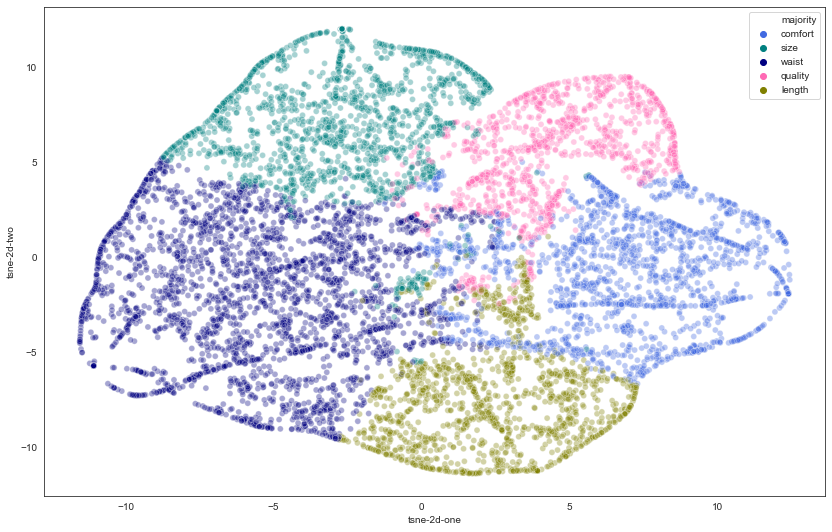

In [40]:
plt.figure(figsize=(14,9))
sns.set_style('white')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="majority",
    palette= ['royalblue', 'teal', 'navy', 'hotpink', 'olive'], 
    data=df_topics,
    legend="full",
    
    alpha=0.35
);

**_Merge with the main Data Frame for further insights_**

In [41]:
df_all = pd.merge(df, df_topics, left_index=True, right_index=True)

In [42]:
df_all.head(3)

,name,review_title,review_body,rating,date_posted,usual_size,size_purchased,height,fit,weight,...,review_nltk,index,0,1,2,3,4,majority,tsne-2d-one,tsne-2d-two
0,Kimbo6,The most comfortable jeans ever,I now live in these jeans. They are so comfort...,5.00,"April 12, 2020",Usual Size: 26,Size Purchased: 25,Height: 5′ 7″,Fit Purchased: Ankle,NaN,...,live jeans are comfortable flattering dont wan...,live jeans are comfortable flattering dont wan...,0.00000,0.06209,0.0,0.00000,0.00000,comfort,12.409830,-1.939408
1,Kshop321,Nice Jean,I went with the 27 noting the other reviews th...,5.00,"April 5, 2020",Usual Size: 28,Size Purchased: 27,Height: 5′ 6″,Fit Purchased: Ankle,Weight: 140,...,went noting other reviews run little large say...,went noting other reviews run little large say...,0.04492,0.00000,0.0,0.01056,0.00273,size,-5.770852,9.575906
2,ac11189,Nice quality but too tight around thighs,"I'm 5'1 and petite, with a tiny waist but also...",4.00,"April 5, 2020",Usual Size: 23,Size Purchased: 23,Height: 5′ 1″,Fit Purchased: Ankle,Weight: 110,...,'m petite tiny waist butt have lot trouble fin...,'m petite tiny waist butt have lot trouble fin...,0.03263,0.00000,0.0,0.08282,0.00000,waist,-10.324561,1.588568


In [43]:
# Drop redundant columns
df_all.columns

Index([          'name',   'review_title',    'review_body',         'rating',
          'date_posted',     'usual_size', 'size_purchased',         'height',
                  'fit',         'weight',   'product_type',            'BMI',
         'review_clean',    'review_nltk',          'index',                0,
                      1,                2,                3,                4,
             'majority',    'tsne-2d-one',    'tsne-2d-two'],
      dtype='object')

In [44]:
df_all.drop(['index', 0,1,2,3,4,'tsne-2d-one',    'tsne-2d-two'], axis=1, inplace=True)

In [45]:
df_all.head(3)

,name,review_title,review_body,rating,date_posted,usual_size,size_purchased,height,fit,weight,product_type,BMI,review_clean,review_nltk,majority
0,Kimbo6,The most comfortable jeans ever,I now live in these jeans. They are so comfort...,5.00,"April 12, 2020",Usual Size: 26,Size Purchased: 25,Height: 5′ 7″,Fit Purchased: Ankle,NaN,The Cheeky Straight Jean,NaN,I now live in these jeans. They are so comfort...,live jeans are comfortable flattering dont wan...,comfort
1,Kshop321,Nice Jean,I went with the 27 noting the other reviews th...,5.00,"April 5, 2020",Usual Size: 28,Size Purchased: 27,Height: 5′ 6″,Fit Purchased: Ankle,Weight: 140,The Cheeky Straight Jean,22.59,I went with the 27 noting the other reviews th...,went noting other reviews run little large say...,size
2,ac11189,Nice quality but too tight around thighs,"I'm 5'1 and petite, with a tiny waist but also...",4.00,"April 5, 2020",Usual Size: 23,Size Purchased: 23,Height: 5′ 1″,Fit Purchased: Ankle,Weight: 110,The Cheeky Straight Jean,20.78,"I'm 5'1 and petite, with a tiny waist but also...",'m petite tiny waist butt have lot trouble fin...,waist


In [46]:
# converting rating from str into float
def make_float(x):
    x = float(x)
    return x

In [47]:
df_all['rating'] = df_all['rating'].apply(make_float) 

**_Applying insights (clusters) to particular product_**

In [48]:
df_all.groupby(['product_type'], as_index=False)['rating'].mean()

,product_type,rating
0,Authentic Stretch High-Rise Skinny,4.683273
1,The Cheeky Bootcut Jean,4.566038
2,The Cheeky Straight Jean,4.530396
3,The Curvy Authentic Stretch High-Rise Skinny Jean,4.629658
4,The Kick Crop Jean,4.471717
5,The Modern Flare Jean,4.602041
6,The Straight Leg Crop,4.732000
7,The Super-Soft Straight Leg Jean,4.391579


In [49]:
df_agg = df_all.groupby(['product_type', 'majority'], as_index=False)['rating'].mean()

In [50]:
df_pivot = df_agg.pivot(index='product_type', columns='majority', values='rating')

In [51]:
df_pivot

majority,comfort,length,quality,size,waist
product_type,,,,,
Authentic Stretch High-Rise Skinny,4.843854,4.748945,4.689304,4.498978,4.614094
The Cheeky Bootcut Jean,4.796875,4.615385,4.696970,4.555556,4.382609
The Cheeky Straight Jean,4.777778,4.600000,4.679348,4.441038,4.411892
The Curvy Authentic Stretch High-Rise Skinny Jean,4.836735,4.653631,4.650888,4.361290,4.618506
The Kick Crop Jean,4.703349,4.689655,4.611650,4.327273,4.303136
The Modern Flare Jean,4.760000,4.615385,4.857143,4.588235,4.344828
The Straight Leg Crop,4.919355,4.684524,4.800000,4.575758,4.693038
The Super-Soft Straight Leg Jean,4.637931,4.750000,4.300000,4.372414,4.148649


In [52]:
df_pivot['website_rating'] = np.nan

In [53]:
df_pivot.loc['The Curvy Authentic Stretch High-Rise Skinny Jean', 'website_rating'] = 4.62

In [54]:
df_pivot.loc['The Cheeky Bootcut Jean', 'website_rating'] = 4.57

In [55]:
df_pivot.loc['The Cheeky Straight Jean', 'website_rating'] = 4.50

In [56]:
df_pivot.loc['Authentic Stretch High-Rise Skinny', 'website_rating'] = 4.69

In [57]:
df_pivot.loc['The Kick Crop Jean', 'website_rating'] = 4.46

In [58]:
df_pivot.loc['The Modern Flare Jean', 'website_rating'] = 4.60

In [59]:
df_pivot.loc['The Straight Leg Crop', 'website_rating'] = 4.73

In [60]:
df_pivot.loc['The Super-Soft Straight Leg Jean', 'website_rating'] = 4.39

In [61]:
df_pivot

majority,comfort,length,quality,size,waist,website_rating
product_type,,,,,,
Authentic Stretch High-Rise Skinny,4.843854,4.748945,4.689304,4.498978,4.614094,4.69
The Cheeky Bootcut Jean,4.796875,4.615385,4.696970,4.555556,4.382609,4.57
The Cheeky Straight Jean,4.777778,4.600000,4.679348,4.441038,4.411892,4.50
The Curvy Authentic Stretch High-Rise Skinny Jean,4.836735,4.653631,4.650888,4.361290,4.618506,4.62
The Kick Crop Jean,4.703349,4.689655,4.611650,4.327273,4.303136,4.46
The Modern Flare Jean,4.760000,4.615385,4.857143,4.588235,4.344828,4.60
The Straight Leg Crop,4.919355,4.684524,4.800000,4.575758,4.693038,4.73
The Super-Soft Straight Leg Jean,4.637931,4.750000,4.300000,4.372414,4.148649,4.39


In [63]:
df_pivot.columns = ['comfort', 'length', 'quality', 'size', 'waist', 'overall']

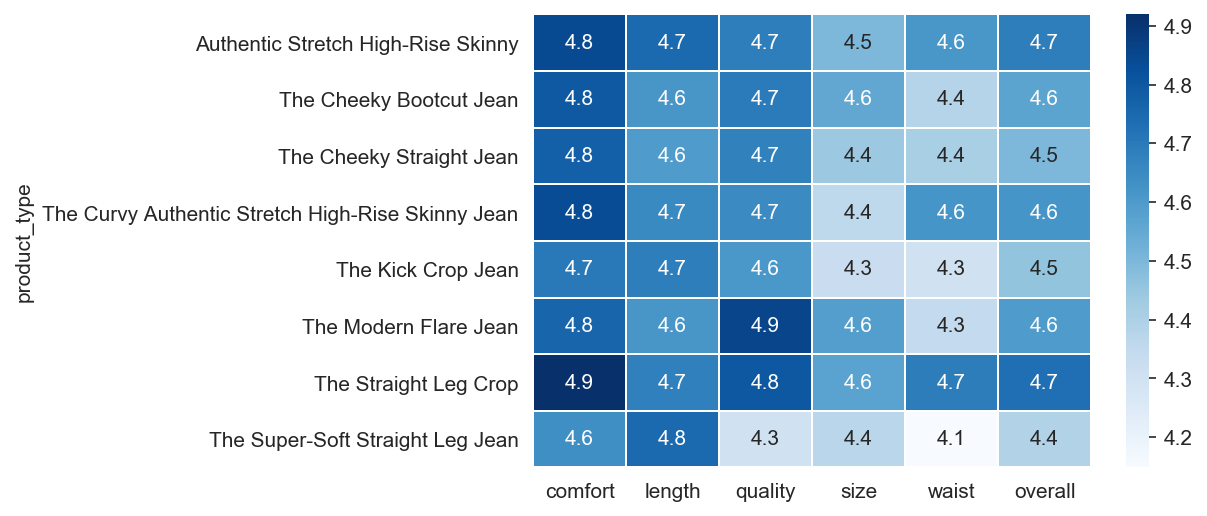

In [64]:
plt.figure(dpi=150);
sns.heatmap(data=df_pivot, annot=True, cmap="Blues", linecolor="white", linewidths=.5);

**_Applying insights (clusters) across height_**

In [ ]:
# Denoting particular height as Petite, Average, Tall

In [65]:
df_all['height_type'] = np.nan

In [66]:
idx_tall = list(df_all[df_all.height > 'Height: 5′ 8″'].index)

In [67]:
for idx in idx_tall:
    df_all.loc[idx, 'height_type'] = 'tall'

In [68]:
df_all[df_all.height > 'Height: 5′ 8″'].shape

(507, 16)

In [69]:
mask = (df_all.height <= 'Height: 5′ 8″')&(df_all.height > 'Height: 5′ 4″')

In [70]:
df_all[mask].shape

(3583, 16)

In [71]:
idx_average = list(df_all[mask].index) 

In [72]:
for idx in idx_average:
    df_all.loc[idx, 'height_type'] = 'average'

In [73]:
idx_petite = list(df_all[df_all.height <= 'Height: 5′ 4″'].index) 

In [74]:
df_all[df_all.height < 'Height: 5′ 4″'].shape

(2729, 16)

In [75]:
for idx in idx_petite:
    df_all.loc[idx, 'height_type'] = 'petite'

In [76]:
df_all.height_type.value_counts(normalize=True)

petite     0.489770
average    0.446981
tall       0.063249
Name: height_type, dtype: float64

In [78]:
df_all.loc[9203,'review_body']

"Fabric feels nice and has good stretch but there were too short for my 5'9 build."

In [79]:
df_all.loc[9203,'majority']

'comfort'

In [80]:
# this review was missclassified 
## downside of majority vote when review represented by several topics

df_all.loc[9203,'majority'] = 'length'

In [81]:
df_height_agg = df_all.groupby(['product_type', 'height_type', 'majority'], as_index=False)['rating'].mean()

In [ ]:
# Separating Data Frames by height

In [82]:
df_tall = df_height_agg[df_height_agg.height_type == 'tall']

In [83]:
df_pivot_tall = df_tall.pivot(index='product_type', columns='majority', values='rating')

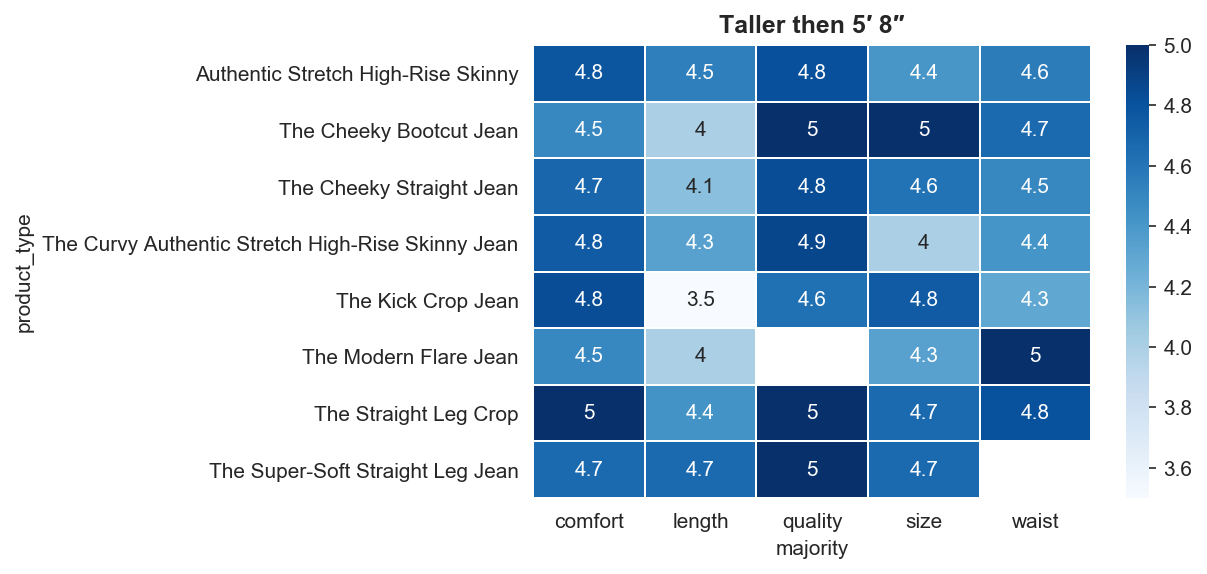

In [84]:
plt.figure(dpi=150);
plt.title('Taller then 5′ 8″', fontsize=12, fontweight='bold')
sns.heatmap(data=df_pivot_tall, annot=True, cmap="Blues", linecolor="white", linewidths=.5, 
             );

In [85]:
df_average = df_height_agg[df_height_agg.height_type == 'average']

In [86]:
df_pivot_average = df_average.pivot(index='product_type', columns='majority', values='rating')

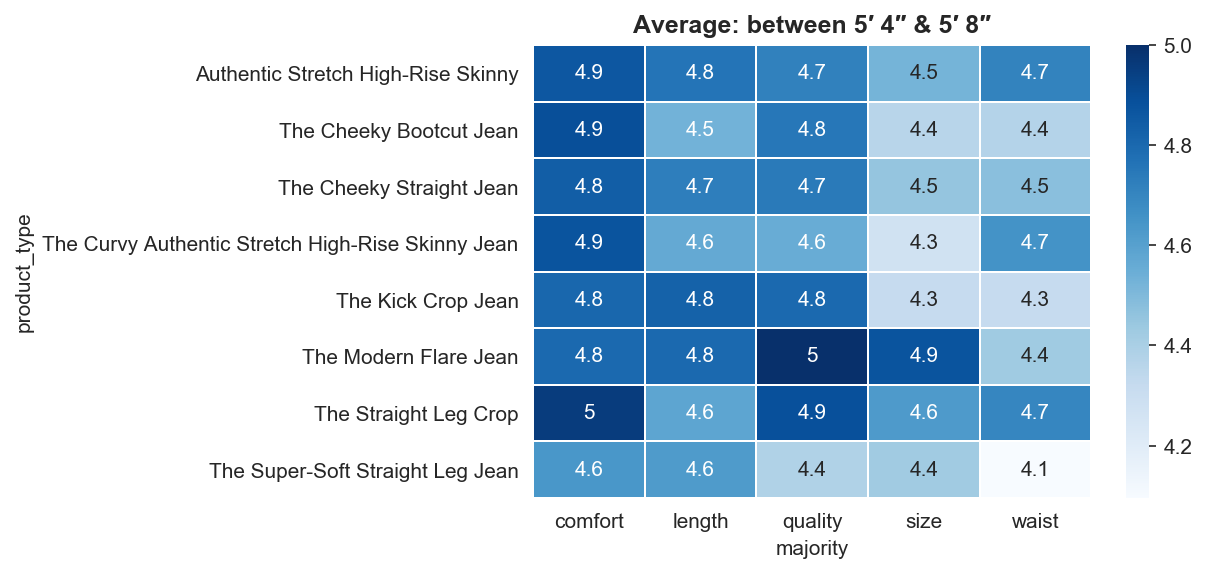

In [87]:
plt.figure(dpi=150);
plt.title('Average: between 5′ 4″ & 5′ 8″', fontsize=12, fontweight='bold')
sns.heatmap(data=df_pivot_average, annot=True, cmap="Blues", linecolor="white", linewidths=.5,
           );

In [88]:
df_petite = df_height_agg[df_height_agg.height_type == 'petite']

In [89]:
df_pivot_petite = df_petite.pivot(index='product_type', columns='majority', values='rating')

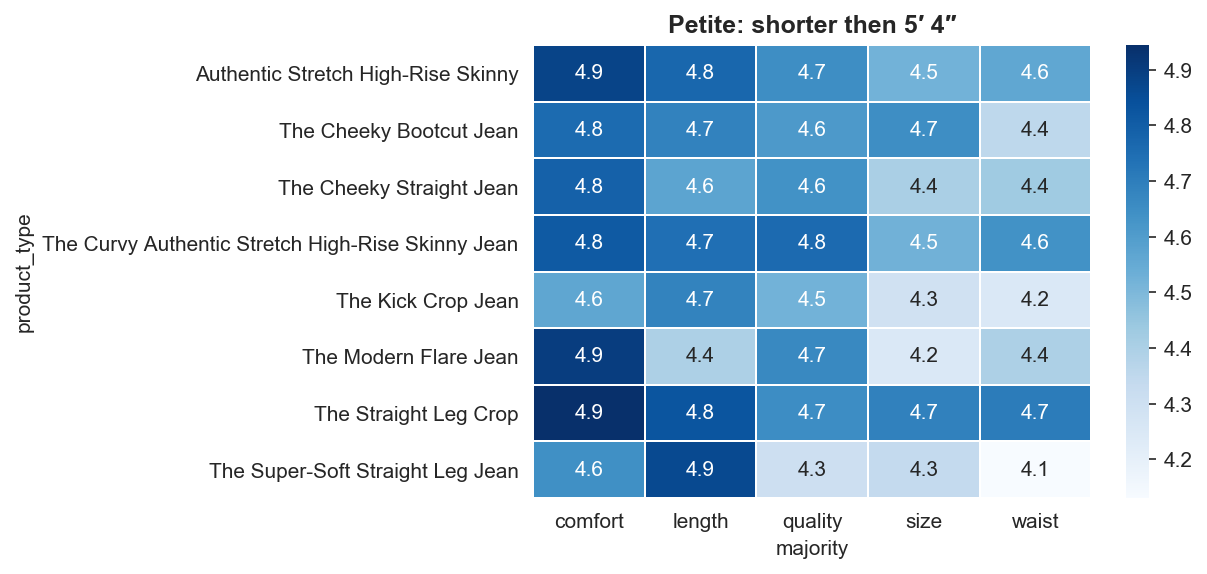

In [90]:
plt.figure(dpi=150);
plt.title('Petite: shorter then 5′ 4″', fontsize=12, fontweight='bold')
sns.heatmap(data=df_pivot_petite, annot=True, cmap="Blues", linecolor="white", linewidths=.5,
           );

_Some of the reviews_

In [ ]:
# For Petite

In [91]:
## Reviews for the size
list(df_all[(df_all.majority == 'size')&(df_all.product_type == 'The Kick Crop Jean')
            &(df_all.height_type == 'petite')&(df_all.rating < 4.0)].review_body)

['I have a pair of The Authentic Stretch High-Rise Skinny jeans in size 25, which fit perfectly.  I also bought the Kick Crop Jean in a size 25 thinking they would have a similar fit, unfortunately these are way too small and I could barely get them over my hips!  This is a much different material that the Authentic Stretch pants; there is little to no stretch with this material.  Definitely size up.  I will unfortunately have to exchange my pair for a larger size as I love the shape of these.',
 'Love the style but these seem to run much smaller than the rest of Everlane pants which run a bit on the big side. In everlane pants I have worn a 00 or 24/25 (but am usually a 0, 25/26 in other brands). I couldn’t even pull these past my thigh! Not sure what to make of the sizing but if I had purchased a larger size I would’ve kept them for sure!',
 'I really loved the colour, but would need to go up a size to feel comfortable in these.',
 'I live Everlane and has purchased product from them

In [ ]:
# Tall

In [92]:
## Reviews for the length
list(df_all[(df_all.majority == 'length')&(df_all.product_type == 'The Curvy Authentic Stretch High-Rise Skinny Jean')
            &(df_all.height_type == 'tall')].review_body)

["The Curvy High-Rise jean is really comfortable and fits my body great, through my thighs, hips, stomach and waist. I love that there is no gap at the waist, it tapers really nicely. The only thing I'd change is that I wish there were a Tall length option, as the Regular length is still a little short for me.",
 "Finally, a pair of jeans that fit my body! I love the fit in the booty and through the thighs. I would love to give a fifth star but as a tall woman I'm in need of some tall sizes, please! I'm 5'9 and the regular length fits me like a shorter ankle length.",
 'These pants fit so nicely! I’m 5’9 140 lbs and the 26 fits beautifully. They make the booty look like a peach. Only problem is the regular length is too short and there’s no tall options. Debating if I will keep them as sexy capris or send them back...  decision decisions.',
 'The fit of these jeans is amazing!  I have been searching for jeans for months and nothing fits like these.  I do wish they were just slightly lo

In [ ]:
# Average

In [93]:
## Reviews for the waist
list(df_all[(df_all.majority == 'waist')&(df_all.product_type == 'The Super-Soft Straight Leg Jean')
            &(df_all.height_type == 'average')&(df_all.rating < 4.0)].review_body)

['These fit me but just were unflattering on my body, just kinda got mom-jeans vibe from them',
 "The jeans are great quality, and I really wanted to love them, but they're just too big in the waist and tight around the butt. I sized down for this, but the waist was still way too big. Make sure to take measurements before buying!",
 "Wanted to love this so much, but the fit just wasn't right for me - the waist ran a little large, and the jeans didn't hit at the ankle like I'd hoped. Super soft material though.",
 'Found the fit a bit off. I love the cheeky straight jeans and have them in a size 26 too. These are looser on the waist but tighter across the thighs, hoping they will stretch out a bit. Also the colour was much darker than expected, don’t think you can really call it a light blue at all. Material is very nice and soft though.',
 'I really liked the way the jeans looked on me, but the ripped before I wore them out of the house the first time I put them on. They are a great co

In [ ]:
#pickle!
df_all.to_pickle("./df_all.pkl")

##df_all = pd.read_pickle("./df_all.pkl")